In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import math as m
import nuSQUIDSpy as nsq
import pisa
import h5py as hdf

<< PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


In [2]:
FLERCNN_vars = {'reco_coszen':'FLERCNN_coszen',
                'reco_energy':'FLERCNN_energy',
                'BDT_PID':'FLERCNN_plus_bdt_PID',
                'PID':'FLERCNN_prob_track',
                'weighted_aeff':'weighted_aeff',
                'livetime':'data_livetime',
                'ReferenceWeight':'ReferenceWeight',
                'true_energy':'MCInIcePrimary.energy',
                'pdg_code':'MCInIcePrimary.pdg_encoding',
                'BDT_y':'FLERCNN_plus_bdt_y',
                'bjorken_y':'I3GENIEResultDict.y',
                'true_rho36':'MCExtraTruthInfo.vertex_rho36',
                'true_coszen':'MCInIcePrimary.dir.coszen',
                'is_cc':'I3GENIEResultDict.cc',
                'is_nc':'I3GENIEResultDict.nc',
                'dis':'I3GENIEResultDict.dis',
                'interaction':'I3MCWeightDict.InteractionType',
}

CNN2D_vars = {'CNN2D_PID':'CNN2D_reco_PID.CNN2D_PID_prob_t',
              'new_lvl3_30gev_100rho':'CNN2D_reco_y.CNN2D_beta_lvl3_30gev_100rho36',
              'new_lvl3_5gev_100rho':'CNN2D_reco_y.CNN2D_beta_lvl3_5gev_100rho36',
              'old_lvl3_30gev_100rho':'CNN2D_reco_y.CNN2D_y_lvl3_30gev_100rho36',
              'old_lvl6_30gev_200rho':'CNN2D_reco_y.CNN2D_y_lvl6_30gev_200rho36',
              'old_lvl3_5gev_100rho':'CNN2D_reco_y.CNN2D_y_lvl3_5gev_100rho36',
              'old_lvl6_5gev_200rho':'CNN2D_reco_y.CNN2D_y_lvl6_5gev_200rho36',
}

Cuts_vars = {
    'reco_z':'FLERCNN_vertex_z',
    'reco_rho':'FLERCNN_vertex_rho36',
    'L7_CoincidentMuon_Variables.n_top15':'L7_CoincidentMuon_Variables.n_top15',
    'L7_CoincidentMuon_Variables.n_outer':'L7_CoincidentMuon_Variables.n_outer',
    'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms':'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms',
    'nDOM':'FLERCNN_nDOM',
    'l7_muon_classifier_prob_nu':'FLERCNN_BDT_ProbNu',
}

def GetCuts(group):
    z = group[Cuts_vars['reco_z']][:]
    rho = group[Cuts_vars['reco_rho']][:]
    ntop15 = group[Cuts_vars['L7_CoincidentMuon_Variables.n_top15']][:]
    nouter = group[Cuts_vars['L7_CoincidentMuon_Variables.n_outer']][:]
    nhitdoms = group[Cuts_vars['L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms']][:]
    ndom = group[Cuts_vars['nDOM']][:]
    probnu = group[Cuts_vars['l7_muon_classifier_prob_nu']][:]
    
    return ((z > -495.) & (z < -225.) &  (rho < 200) & (ntop15 < 0.5) & 
            (nouter < 7.5) & (nhitdoms > 2.5) & (ndom >= 7) & (probnu >= 0.8))

In [3]:
folder = '/afs/ifh.de/user/a/akumar/lustre/data/oscNext/flercnn_sample_inelasticity/'

pisahdf_filenames ={'0000':'oscNext_pisa_genie_0000_flercnn_plus.hdf5',
                    '1122':'oscNext_pisa_genie_1122_flercnn_plus.hdf5',
                    '1151':'oscNext_pisa_genie_1151_flercnn_plus.hdf5',
                    '1154':'oscNext_pisa_genie_1154_flercnn_plus.hdf5',
                    '121151':'FLERCNN_plus_121151.h5',
                    '141154':'FLERCNN_plus_141154.h5',
                    '161151':'FLERCNN_plus_161151.h5'
                   }

#1151 contains muons neutrinos
#1154 muon neutrinos + GEANT4
#FLERCNN_plus = old
#oscNext_pisa_genie = new

In [14]:
neu_flercnn = hdf.File(folder+pisahdf_filenames['1122'],'r')

In [15]:
true_E_flercnn_numu_cc = neu_flercnn['numu_cc'][FLERCNN_vars['true_energy']][:]
reco_E_flercnn_numu_cc = neu_flercnn['numu_cc'][FLERCNN_vars['reco_energy']][:]

true_E_flercnn_numubar_cc = neu_flercnn['numubar_cc'][FLERCNN_vars['true_energy']][:]
reco_E_flercnn_numubar_cc = neu_flercnn['numubar_cc'][FLERCNN_vars['reco_energy']][:]

true_E_flercnn_numu_nc = neu_flercnn['numu_nc'][FLERCNN_vars['true_energy']][:]
reco_E_flercnn_numu_nc = neu_flercnn['numu_nc'][FLERCNN_vars['reco_energy']][:]

true_E_flercnn_numubar_nc = neu_flercnn['numubar_nc'][FLERCNN_vars['true_energy']][:]
reco_E_flercnn_numubar_nc = neu_flercnn['numubar_nc'][FLERCNN_vars['reco_energy']][:]

In [154]:
true_E_flercnn_nue_cc = neu_flercnn['nue_cc'][FLERCNN_vars['true_energy']][:]
reco_E_flercnn_nue_cc = neu_flercnn['nue_cc'][FLERCNN_vars['reco_energy']][:]

true_E_flercnn_nuebar_cc = neu_flercnn['nuebar_cc'][FLERCNN_vars['true_energy']][:]
reco_E_flercnn_nuebar_cc = neu_flercnn['nuebar_cc'][FLERCNN_vars['reco_energy']][:]

true_E_flercnn_nue_nc = neu_flercnn['nue_nc'][FLERCNN_vars['true_energy']][:]
reco_E_flercnn_nue_nc = neu_flercnn['nue_nc'][FLERCNN_vars['reco_energy']][:]

true_E_flercnn_nuebar_nc = neu_flercnn['nuebar_nc'][FLERCNN_vars['true_energy']][:]
reco_E_flercnn_nuebar_nc = neu_flercnn['nuebar_nc'][FLERCNN_vars['reco_energy']][:]

In [160]:
res_E_flercnn_numu_cc = reco_E_flercnn_numu_cc - true_E_flercnn_numu_cc
res_E_flercnn_numu_nc = reco_E_flercnn_numu_nc - true_E_flercnn_numu_nc
res_E_flercnn_nue_cc = reco_E_flercnn_nue_cc - true_E_flercnn_nue_cc

Text(0.5, 1.0, 'numu-cc normalized by column')

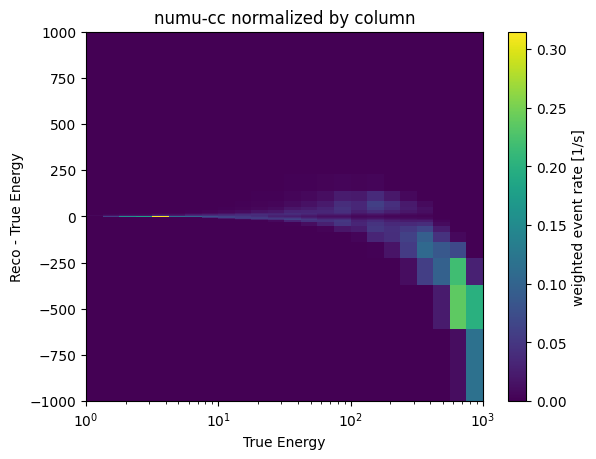

In [162]:
normweights = np.zeros_like(true_E_flercnn_numu_cc)
for i,en in enumerate(np.geomspace(1,1e4,14)[:-1]):
    valid_inds = ((en < true_E_flercnn_numu_cc)) & (true_E_flercnn_numu_cc < np.geomspace(1,1e4,14)[i+1])
    normweights[valid_inds] = 1/np.sum(valid_inds)

    
A=plt.hist2d(true_E_flercnn_numu_cc,res_E_flercnn_numu_cc,bins=(np.geomspace(1,1e3,25),np.append(-np.geomspace(1e3,1,15),np.geomspace(1,1e3,15)))
             ,weights = normweights);
plt.xscale('log')
plt.colorbar(label='weighted event rate [1/s]')
plt.xlabel('True Energy')
plt.ylabel('Reco - True Energy')
plt.title('numu-cc normalized by column')

In [19]:
weight_file = hdf.File('FluxOscWeights/fluxoscweights.h5','r')

In [20]:
proper_flux_osc_weights_nue_cc = weight_file['nue_cc_osc_flux_weights'][:]
proper_flux_osc_weights_nuebar_cc = weight_file['nuebar_cc_osc_flux_weights'][:]
proper_flux_osc_weights_nue_nc = weight_file['nue_nc_osc_flux_weights'][:]
proper_flux_osc_weights_nuebar_nc = weight_file['nuebar_nc_osc_flux_weights'][:]

proper_flux_osc_weights_numu_cc = weight_file['numu_cc_osc_flux_weights'][:]
proper_flux_osc_weights_numubar_cc = weight_file['numubar_cc_osc_flux_weights'][:]
proper_flux_osc_weights_numu_nc = weight_file['numu_nc_osc_flux_weights'][:]
proper_flux_osc_weights_numubar_nc = weight_file['numubar_nc_osc_flux_weights'][:]

proper_flux_osc_weights_nutau_cc = weight_file['nutau_cc_osc_flux_weights'][:]
proper_flux_osc_weights_nutaubar_cc = weight_file['nutaubar_cc_osc_flux_weights'][:]
proper_flux_osc_weights_nutau_nc = weight_file['nutau_nc_osc_flux_weights'][:]
proper_flux_osc_weights_nutaubar_nc = weight_file['nutaubar_nc_osc_flux_weights'][:]

In [24]:
def weighted_quantile(
    values,
    quantiles,
    sample_weight=None,
    values_sorted=False,
):
    """
    Very close to numpy.percentile, but supports weights. Qantiles should be in [0, 1]!
    
    Parameters
    ----------
    values : array of floats
        Input data.
    quantiles : array of floats
        Quantile values to compute.
    sample_weight : array of floats
        Weights of the input data.
    values_sorted : bool
        Are the input values sorted, or not.

    Returns
    -------
    quantiles : array of floats
        Computed quantiles.
    """

    import numpy as np

    values = np.array(values)
    quantiles = np.array(quantiles)

    if values.size == 0: return(np.nan)

    if sample_weight is None:
        sample_weight = np.ones(len(values))

    sample_weight = np.array(sample_weight)

    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), 'quantiles should be in [0, 1]'   

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    weighted_quantiles /= np.sum(sample_weight)

    return np.interp(quantiles, weighted_quantiles, values)

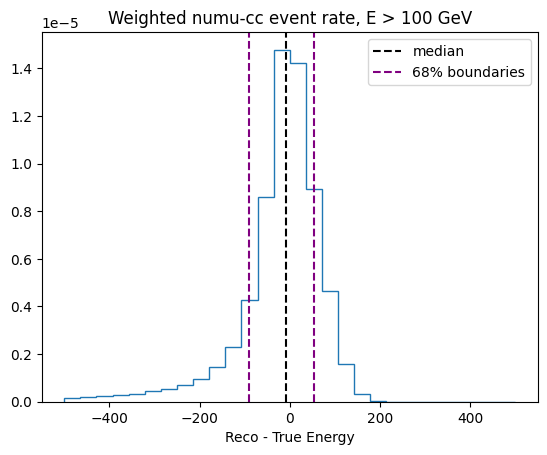

In [31]:
plt.hist(res_E_flercnn_numu_cc[true_E_flercnn_numu_cc>100],histtype='step',bins=np.linspace(-500,500,29),
        weights=proper_flux_osc_weights_numu_cc[true_E_flercnn_numu_cc>100])
quantiles = weighted_quantile(res_E_flercnn_numu_cc[true_E_flercnn_numu_cc>100],[0.16,0.5,0.84],
                              proper_flux_osc_weights_numu_cc[true_E_flercnn_numu_cc>100])
plt.axvline(x=quantiles[1],label='median',ls='dashed',color='black')
plt.axvline(x=quantiles[0],label='68% boundaries',ls='dashed',color='purple')
plt.axvline(x=quantiles[2],ls='dashed',color='purple')
plt.xlabel('Reco - True Energy')
plt.title('Weighted numu-cc event rate, E > 100 GeV')
plt.legend()

In [30]:
from pisa.core.distribution_maker import DistributionMaker
import os

In [117]:
VS_FRIDGE_SETTINGS_DIR = (
    '/afs/ifh.de/user/b/buchholl/scratch/software/fridge/analysis/oscnext_sterile/settings'
)

NEW_FRIDGE_SETTINGS_PATH = (
    '/afs/ifh.de/user/b/buchholl/scratch/software/fridge/analysis/oscNext_flercnn_sterile/settings'
)

path = "/afs/ifh.de/user/b/buchholl/scratch/software/fridge/analysis/"

flercnn_muon_pipeline = os.path.join(NEW_FRIDGE_SETTINGS_PATH, "pipeline", "pipeline_oscNext_muons_PIDbins.cfg")
flercnn_neu_pipeline = os.path.join(NEW_FRIDGE_SETTINGS_PATH, "pipeline", "pipeline_oscNext_neutrinos_sterile_nh_flercnn_PIDbins.cfg")
flercnn_pipeline = [flercnn_neu_pipeline,flercnn_muon_pipeline]

flercnn_old_neu_pipeline = os.path.join(NEW_FRIDGE_SETTINGS_PATH, "pipeline", "pipeline_oscNext_neutrinos_sterile_nh_flercnn_old_PIDbins.cfg")
flercnn_old_pipeline = [flercnn_old_neu_pipeline,flercnn_muon_pipeline]

vs_muon_pipeline = os.path.join(VS_FRIDGE_SETTINGS_DIR, "pipeline", "muons_kde_vs.cfg")
vs_neu_pipeline = os.path.join(VS_FRIDGE_SETTINGS_DIR, "pipeline", "neutrinos_mixing_angles_ultrasurfaces_vs.cfg")
vs_pipeline = [vs_neu_pipeline,vs_muon_pipeline]

In [118]:
template_maker_flercnn = DistributionMaker(flercnn_pipeline)
template_maker_old_flercnn = DistributionMaker(flercnn_old_pipeline)
template_maker_vs = DistributionMaker(vs_pipeline)

In [119]:
flercnn_template = template_maker_flercnn.get_outputs(return_sum=False)
old_flercnn_template = template_maker_old_flercnn.get_outputs(return_sum=False)
vs_template = template_maker_vs.get_outputs(return_sum=False)

[ WARNING] /afs/ifh.de/group/amanda/scratch/buchholl/software/snuvenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2385: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  inputs = [asanyarray(a, dtype=object) for a in args]



In [120]:
mixed_neu_numbers_per_channel_vs = {}
tracks_neu_number_per_channel_vs = {}
muon_number_vs = {}

mixed_neu_numbers_per_channel_flercnn = {}
tracks_neu_number_per_channel_flercnn = {}
muon_number_flercnn = {}

mixed_neu_numbers_per_channel_old_flercnn = {}
tracks_neu_number_per_channel_old_flercnn = {}
muon_number_old_flercnn = {}

In [132]:
for name in vs_template[0].names:
    mixed_neu_numbers_per_channel_vs.update({name:
                                             vs_template[0][name].split('pid')[name+'_pid_mixed'].hist.sum().nominal_value})
    tracks_neu_number_per_channel_vs.update({name:
                                             vs_template[0][name].split('pid')[name+'_pid_tracks'].hist.sum().nominal_value})
for name in vs_template[1].names:
    muon_number_vs.update({name:vs_template[1][name].hist.sum().nominal_value})

for name in flercnn_template[0].names:
    mixed_neu_numbers_per_channel_flercnn.update({name:
                                             flercnn_template[0][name].split('pid')[name+'_pid_mixed'].hist.sum().nominal_value})
    tracks_neu_number_per_channel_flercnn.update({name:
                                             flercnn_template[0][name].split('pid')[name+'_pid_tracks'].hist.sum().nominal_value})
for name in flercnn_template[1].names:
    muon_number_flercnn.update({name:flercnn_template[1][name].hist.sum().nominal_value})

for name in old_flercnn_template[0].names:
    mixed_neu_numbers_per_channel_old_flercnn.update({name:
                                             old_flercnn_template[0][name].split('pid')[name+'_pid_mixed'].hist.sum().nominal_value})
    tracks_neu_number_per_channel_old_flercnn.update({name:
                                             old_flercnn_template[0][name].split('pid')[name+'_pid_tracks'].hist.sum().nominal_value})
for name in old_flercnn_template[1].names:
    muon_number_old_flercnn.update({name:old_flercnn_template[1][name].hist.sum().nominal_value})

In [153]:
name = 'nutaubar_nc'
mixed_neu_numbers_per_channel_vs[name],tracks_neu_number_per_channel_vs[name],mixed_neu_numbers_per_channel_old_flercnn[name],tracks_neu_number_per_channel_old_flercnn[name],mixed_neu_numbers_per_channel_flercnn[name],tracks_neu_number_per_channel_flercnn[name]

(21.913055826838214,
 3.542962190107303,
 107.00755752766825,
 8.10311748683052,
 107.1633437832708,
 8.17819377022037)